In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import named_colors, fancy_legend, mpl_loc, load_style_sheet, markers
from astropy.io import fits
import numpy as np
import vice
import sys
load_style_sheet("papers")
print(sys.version_info)

sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)


/Users/jamesjohnson/Work/Research/lib/public-dev/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
TCOND = dict()
with open("tcond.dat", 'r') as f:
    while True:
        line = f.readline()
        if line == "": break
        if line[0] == "#": continue
        line = line.split()
        TCOND[line[0].lower()] = float(line[1])
    f.close()
print(TCOND)

{'c': 78.0, 'n': 123.0, 'o': 180.0, 'zn': 726.0, 'na': 958.0, 'cu': 1037.0, 'mn': 1158.0, 'cr': 1296.0, 'fe': 1334.0, 'co': 1352.0, 'ni': 1353.0, 'eu': 1356.0, 'mg': 1397.0, 'v': 1429.0, 'ba': 1455.0, 'sr': 1464.0, 'ce': 1478.0, 'ca': 1517.0, 'si': 1529.0, 'la': 1578.0, 'ti': 1582.0, 'sm': 1590.0, 'nd': 1602.0, 'al': 1653.0, 'sc': 1659.0, 'y': 1659.0, 'zr': 1741.0, 's': 704.0, 'k': 1006.0}


In [3]:
ELEMENTS = ["mg", "o", "si", "s", "ca", "na", "al", "k", "cr", "fe", "ni", "mn", "co", "ce"]
with fits.open("fcc_KPM_APOGEE.fits") as hdul:
    fccs = {}
    fccs["mg_h"] = hdul[1].data["Mg_H_obs"]
    for elem in ELEMENTS:
        fccs[elem] = hdul[1].data["%s_H_fcc" % (elem.capitalize())]
    fccs = vice.dataframe(fccs)
    hdul.close()
print(fccs)

vice.dataframe{
    mg_h -----------> [-0.130251, -0.199826, -0.195454, ... , -0.179331, -0.0219374, -0.207697]
    mg -------------> [0.999874, 0.999888, 0.999892, ... , 0.999896, 0.999887, 0.999967]
    o --------------> [0.907159, 0.920611, 0.923688, ... , 0.925148, 0.898798, 0.975455]
    si -------------> [0.79511, 0.821305, 0.827327, ... , 0.829865, 0.793629, 0.940461]
    s --------------> [0.944777, 0.9624, 0.963418, ... , 0.962257, 0.917052, 0.989012]
    ca -------------> [0.664488, 0.690257, 0.69947, ... , 0.704972, 0.69953, 0.88421]
    na -------------> [0.491384, 0.505936, 0.518679, ... , 0.531107, 0.490273, 0.775651]
    al -------------> [0.897492, 0.876189, 0.883105, ... , 0.893607, 0.939099, 0.958859]
    k --------------> [0.907882, 0.914389, 0.91814, ... , 0.921303, 0.909403, 0.973122]
    cr -------------> [0.395127, 0.426304, 0.437049, ... , 0.443527, 0.419376, 0.717811]
    fe -------------> [0.3943, 0.422587, 0.433465, ... , 0.440555, 0.420946, 0.714499]
    ni 

In [8]:
GRADIENTS = dict()
# with open("./grad_xh.out", "r") as f:
with open("./grad_xfe.out", "r") as f:
    while True:
        line = f.readline()
        if line == "": break
        if line[0] == "#": continue
        line = line.split()
        GRADIENTS[line[0].lower()] = [float(line[1]), float(line[2])]
    f.close()
print(GRADIENTS)

{'al': [0.00661683, 0.00143026], 'ca': [0.00733523, 0.00119382], 'ce': [0.0373285, 0.00480282], 'co': [-0.00371744, 0.00186325], 'cr': [-0.00332578, 0.000347212], 'o': [0.00532647, 0.00116264], 'k': [0.00095832, 0.00222597], 's': [0.010418, 0.000851516], 'na': [-0.00975899, 0.00200744], 'mg': [0.00612295, 0.000473525], 'mn': [-0.0168976, 0.00342333], 'fe': [0.0, 0.0], 'si': [0.00502461, 0.000387083], 'ni': [-0.0036735, 0.000908106]}


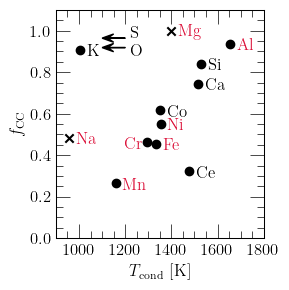

In [5]:
fig = plt.figure(figsize = (3, 3))
ax = fig.add_subplot(111)
ax.set_xlabel(r"$T_\text{cond}$ [K]")
ax.set_ylabel(r"$f_\text{CC}$")
ax.set_ylim([0, 1.1])
ax.set_xlim([900, 1800])
ax.set_xticks([1000, 1200, 1400, 1600, 1800])

elements_subset = ["fe", "mg", "na", "mn", "cr", "ni", "al"]
annotation_offsets = dict(zip(ELEMENTS, len(ELEMENTS) * [(30, -0.03)]))
annotation_offsets["cr"] = (-100, -0.03)
annotation_offsets["o"] = (20, -0.04)
annotation_offsets["s"] = (20, 0.00)
marker_styles = dict(zip(ELEMENTS, len(ELEMENTS) * ["circle"]))
marker_styles["mg"] = "x"
marker_styles["na"] = "x"
marker_styles["o"] = "triangle_left"
marker_styles["s"] = "triangle_left"

sub = fccs.filter("mg_h", ">=", -0.1).filter("mg_h", "<=", 0.1)
for elem in ELEMENTS:
    med_fcc = np.median(fccs["%s" % (elem)])
    if elem in ["o", "s"]:
        xval = 1200
        kwargs = {
            "color": named_colors()["black"],
            "overhang": 0.5,
            "length_includes_head": True,
            "head_width": 0.04,
            "head_length": 50
        }
        ax.arrow(xval, med_fcc, -100, 0, **kwargs)
    else:
        xval = TCOND[elem]
        kwargs = {
            "c": named_colors()["black"],
            "marker": markers()[marker_styles[elem]]
        }
        ax.scatter(xval, med_fcc, **kwargs)
    kwargs = {"fontsize": 12}
    if elem in elements_subset: kwargs["color"] = "crimson"
    ax.annotate(elem.capitalize(),
        (xval + annotation_offsets[elem][0], med_fcc + annotation_offsets[elem][1]),
        **kwargs)

plt.tight_layout()
plt.savefig("./fcc-tcond.pdf")
plt.show()

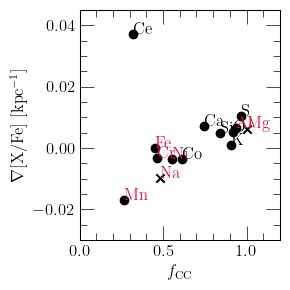

In [10]:
fig = plt.figure(figsize = (3, 3))
ax = fig.add_subplot(111)
ax.set_xlabel(r"$f_\text{CC}$")
# ax.set_ylabel(r"$\nabla$[X/H] [kpc$^{-1}$]")
# ax.set_ylabel(r"$\nabla$[X/H] $- \nabla$[Fe/H] [kpc$^{-1}$]")
ax.set_ylabel(r"$\nabla$[X/Fe] [kpc$^{-1}$]")
ax.set_xlim([0, 1.2])
# ax.set_ylim([-0.11, -0.02])
ax.set_ylim([-0.03, 0.045])

elements_subset = ["fe", "mg", "na", "mn", "cr", "ni", "al"]
annotation_offsets = dict(zip(ELEMENTS, len(ELEMENTS) * [(0, 0)]))
# annotation_offsets["mn"] = (0.02, -0.005)
# annotation_offsets["na"] = (0.02, -0.005)
# annotation_offsets["co"] = (0.02, -0.005)
# annotation_offsets["fe"] = (-0.12, 0)
# annotation_offsets["cr"] = (-0.15, -0.005)
# annotation_offsets["ni"] = (-0.05, 0.002)
# annotation_offsets["ca"] = (-0.15, 0)
# annotation_offsets["si"] = (0.02, -0.008)
# annotation_offsets["o"] = (0.02, -0.007)
# annotation_offsets["mg"] = (0.02, -0.007)
# annotation_offsets["k"] = (-0.1, 0)
# annotation_offsets["al"] = (-0.06, 0.002)
# annotation_offsets["s"] = (0.02, 0.002)
# annotation_offsets["ce"] = (0.02, -0.005)
marker_styles = dict(zip(ELEMENTS, len(ELEMENTS) * ["circle"]))
marker_styles["mg"] = "x"
marker_styles["na"] = "x"

sub = fccs.filter("mg_h", ">=", -0.1).filter("mg_h", "<=", 0.1)
for elem in ELEMENTS:
    med_fcc = np.median(fccs["%s" % (elem)])
    # yval = GRADIENTS[elem][0]
    yval = GRADIENTS[elem][0] - GRADIENTS["fe"][0]
    kwargs = {
        "c": named_colors()["black"],
        "marker": markers()[marker_styles[elem]]
    }
    ax.scatter(med_fcc, yval, **kwargs)
    kwargs = {"fontsize": 12}
    if elem in elements_subset: kwargs["color"] = "crimson"
    ax.annotate(elem.capitalize(),
        (med_fcc + annotation_offsets[elem][0], yval + annotation_offsets[elem][1]),
        **kwargs)
    
plt.tight_layout()
plt.savefig("gradxfe-fcc.pdf")
plt.show()

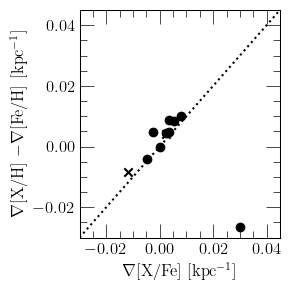

In [21]:
fig = plt.figure(figsize = (3, 3))
ax = fig.add_subplot(111)
ax.set_xlabel(r"$\nabla$[X/Fe] [kpc$^{-1}$]")
ax.set_ylabel(r"$\nabla$[X/H] $- \nabla$[Fe/H] [kpc$^{-1}$]")
ax.set_xlim([-0.03, 0.045])
ax.set_ylim([-0.03, 0.045])
ax.plot(ax.get_xlim(), ax.get_xlim(), c = named_colors()["black"], linestyle = ":")

elements_subset = ["fe", "mg", "na", "mn", "cr", "ni", "al"]
annotation_offsets = dict(zip(ELEMENTS, len(ELEMENTS) * [(0, 0)]))
# annotation_offsets["mn"] = (0.02, -0.005)
# annotation_offsets["na"] = (0.02, -0.005)
# annotation_offsets["co"] = (0.02, -0.005)
# annotation_offsets["fe"] = (-0.12, 0)
# annotation_offsets["cr"] = (-0.15, -0.005)
# annotation_offsets["ni"] = (-0.05, 0.002)
# annotation_offsets["ca"] = (-0.15, 0)
# annotation_offsets["si"] = (0.02, -0.008)
# annotation_offsets["o"] = (0.02, -0.007)
# annotation_offsets["mg"] = (0.02, -0.007)
# annotation_offsets["k"] = (-0.1, 0)
# annotation_offsets["al"] = (-0.06, 0.002)
# annotation_offsets["s"] = (0.02, 0.002)
# annotation_offsets["ce"] = (0.02, -0.005)
marker_styles = dict(zip(ELEMENTS, len(ELEMENTS) * ["circle"]))
marker_styles["mg"] = "x"
marker_styles["na"] = "x"

grad_xfe = dict()
with open("grad_xfe_median.out", "r") as f:
    while True:
        line = f.readline()
        if line == "": break
        if line[0] == "#": continue
        line = line.split()
        grad_xfe[line[0].lower()] = float(line[1])
    f.close()

gradxh_minus_feh = dict()
with open("grad_xh_median.out", "r") as f:
    while True:
        line = f.readline()
        if line == "": break
        if line[0] == "#": continue
        line = line.split()
        gradxh_minus_feh[line[0].lower()] = float(line[1])
    f.close()

for elem in ELEMENTS:
    gradxh_minus_feh[elem] -= gradxh_minus_feh["fe"]
    kwargs = {
        "c": named_colors()["black"],
        "marker": markers()[marker_styles[elem]]
    }
    ax.scatter(grad_xfe[elem], gradxh_minus_feh[elem], **kwargs)
    # kwargs = {"fontsize": 12}
    # if elem in elements_subset: kwargs["color"] = "crimson"
    # ax.annotate(elem.capitalize(),
    #     (med_fcc + annotation_offsets[elem][0], yval + annotation_offsets[elem][1]),
    #     **kwargs)

plt.tight_layout()
plt.savefig("./gradxhminusfeh-gradxh-median.pdf")
plt.show()

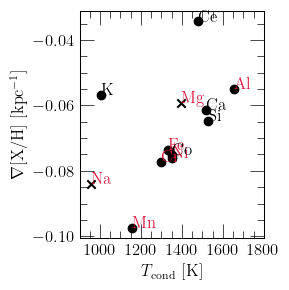

In [7]:
fig = plt.figure(figsize = (3, 3))
ax = fig.add_subplot(111)
ax.set_xlabel(r"$T_\text{cond}$ [K]")
ax.set_ylabel(r"$\nabla$[X/H] [kpc$^{-1}$]")
# ax.set_ylim([0, 1.1])
ax.set_xlim([900, 1800])
ax.set_xticks([1000, 1200, 1400, 1600, 1800])

elements_subset = ["fe", "mg", "na", "mn", "cr", "ni", "al"]
annotation_offsets = dict(zip(ELEMENTS, len(ELEMENTS) * [(0, 0)]))
# annotation_offsets["cr"] = (-100, -0.03)
# annotation_offsets["o"] = (20, -0.04)
# annotation_offsets["s"] = (20, 0.00)
marker_styles = dict(zip(ELEMENTS, len(ELEMENTS) * ["circle"]))
marker_styles["mg"] = "x"
marker_styles["na"] = "x"
marker_styles["o"] = "triangle_left"
marker_styles["s"] = "triangle_left"

# sub = fccs.filter("mg_h", ">=", -0.1).filter("mg_h", "<=", 0.1)
for elem in ELEMENTS:
    # med_fcc = np.median(fccs["%s" % (elem)])
    yval = GRADIENTS[elem][0]
    # if elem in ["o", "s"]:
    #     xval = 1200
    #     kwargs = {
    #         "color": named_colors()["black"],
    #         "overhang": 0.5,
    #         "length_includes_head": True,
    #         "head_width": 0.04,
    #         "head_length": 50
    #     }
    #     ax.arrow(xval, yval, -100, 0, **kwargs)
    # else:
    xval = TCOND[elem]
    kwargs = {
        "c": named_colors()["black"],
        "marker": markers()[marker_styles[elem]]
    }
    # ax.scatter(xval, med_fcc, **kwargs)
    ax.scatter(xval, yval, **kwargs)
    kwargs = {"fontsize": 12}
    if elem in elements_subset: kwargs["color"] = "crimson"
    ax.annotate(elem.capitalize(),
        (xval + annotation_offsets[elem][0], yval + annotation_offsets[elem][1]),
        **kwargs)

plt.tight_layout()
plt.savefig("./gradxh-tcond.pdf")
plt.show()